In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv')

df.replace('NA', pd.NA, inplace=True)
df.replace('nan', pd.NA, inplace=True)

In [3]:
def missingGraph():
    # Show the missing values in the dataset
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Display the identified categorical and numerical features
    print("Categorical Features:")
    print(categorical_features)
    print("\nNumerical Features:")
    print(numerical_features)

    # Calculate the percentage of missing values for each feature
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    categorical_missing = missing_percentage[categorical_features]
    numerical_missing = missing_percentage[numerical_features]

    # Create a bar plot for missing values in categorical and numerical features
    _, ax = plt.subplots(figsize=(10, 6))
    ax.bar(categorical_missing.index, categorical_missing, color='blue', label='Categorical')
    ax.bar(numerical_missing.index, numerical_missing, color='orange', label='Numerical')

    # Set labels and title for the plot
    ax.set_xlabel('Column Name')
    ax.set_ylabel('Percentage of Missing Values')
    ax.set_title('Percentage of Missing Values in Categorical and Numerical Features')
    ax.legend()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

Categorical Features:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical Features:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


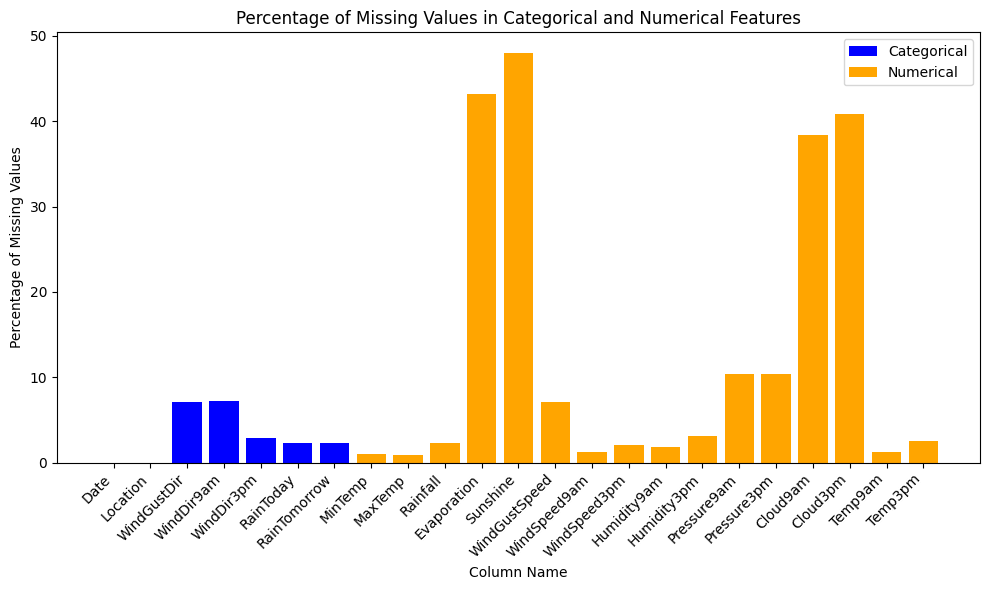

In [4]:
missingGraph() # before pre-processing

In [5]:
from sklearn.preprocessing import LabelEncoder

Pre - Processing

In [6]:
# Initial view of the dataset
print(df.head)

<bound method NDFrame.head of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W  

In [7]:
# List of columns to drop from the DataFrame
columns_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Date']

# Drop specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Drop rows where any remaining columns have null values
df = df.dropna()
print(df.head)

# List of columns to encode using LabelEncoder
columns_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

# Initialize LabelEncoder and encode each column in columns_to_encode list
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

<bound method NDFrame.head of        Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0        Albury     13.4     22.9       0.6           W           44.0   
1        Albury      7.4     25.1       0.0         WNW           44.0   
2        Albury     12.9     25.7       0.0         WSW           46.0   
3        Albury      9.2     28.0       0.0          NE           24.0   
4        Albury     17.5     32.3       1.0           W           41.0   
...         ...      ...      ...       ...         ...            ...   
145454    Uluru      3.5     21.8       0.0           E           31.0   
145455    Uluru      2.8     23.4       0.0           E           31.0   
145456    Uluru      3.6     25.3       0.0         NNW           22.0   
145457    Uluru      5.4     26.9       0.0           N           37.0   
145458    Uluru      7.8     27.0       0.0          SE           28.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       

In [8]:
# Dataset after dropping columns and removing rows with NaN cells
print(df.head)

<bound method NDFrame.head of         Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0              1     13.4     22.9       0.6           13           44.0   
1              1      7.4     25.1       0.0           14           44.0   
2              1     12.9     25.7       0.0           15           46.0   
3              1      9.2     28.0       0.0            4           24.0   
4              1     17.5     32.3       1.0           13           41.0   
...          ...      ...      ...       ...          ...            ...   
145454        36      3.5     21.8       0.0            0           31.0   
145455        36      2.8     23.4       0.0            0           31.0   
145456        36      3.6     25.3       0.0            6           22.0   
145457        36      5.4     26.9       0.0            3           37.0   
145458        36      7.8     27.0       0.0            9           28.0   

        WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3p

In [9]:
import seaborn as sns

In [10]:
def showOutliers():
    # Create a new figure and axis for the combined boxplot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Use Seaborn to create a boxplot for each specified column on the same axes
    sns.boxplot(data=df[list(df.columns)], ax=ax)

    # Set title for the plot
    ax.set_title('Combined Boxplot for Outlier Detection')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Close the plot to free up resources
    plt.show()

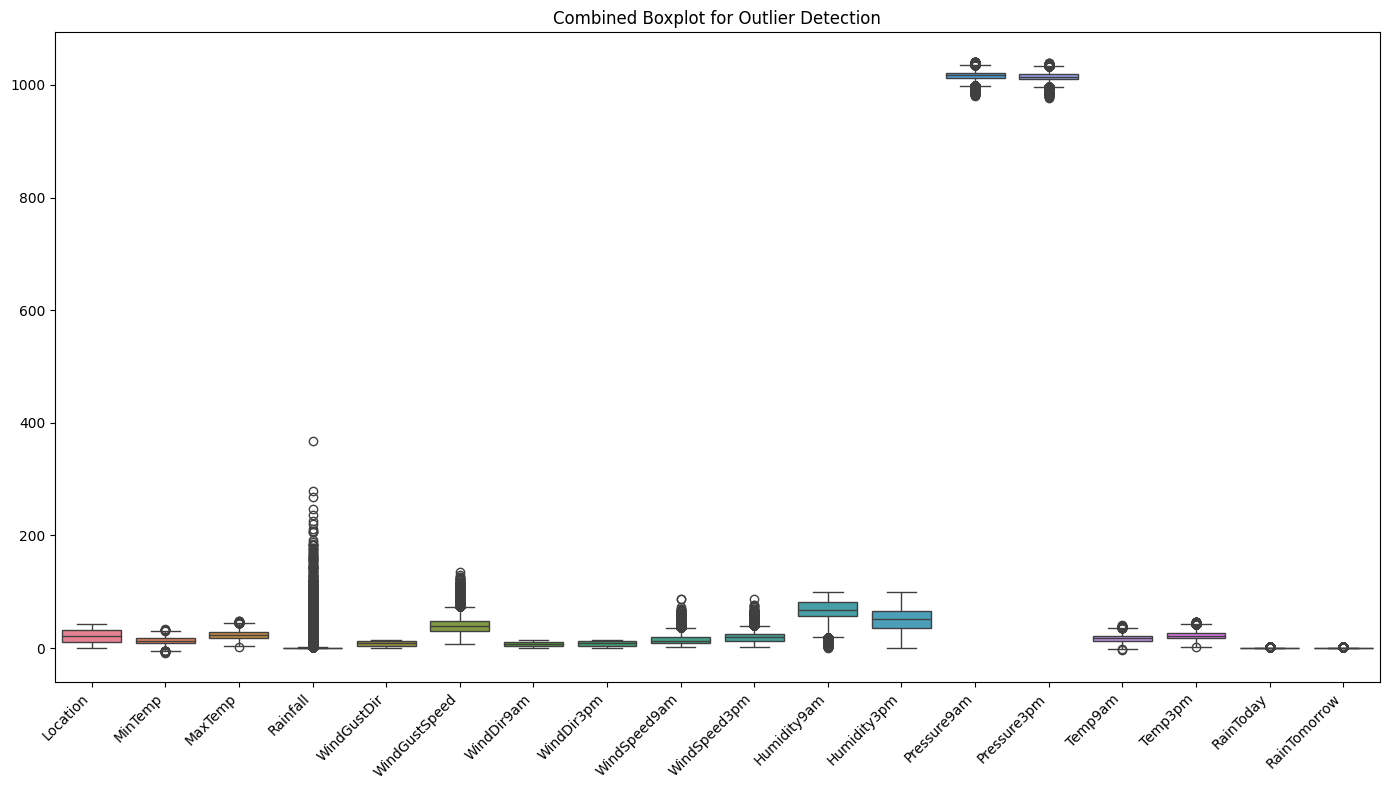

In [11]:
showOutliers()

In [12]:
print("Shape of dataset before IQR:", df.shape)

# Select numerical features for outlier detection
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate quartiles and IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]
print("Shape of dataset after IQR:", df.shape)

Shape of dataset before IQR: (112925, 18)
Shape of dataset after IQR: (112925, 18)


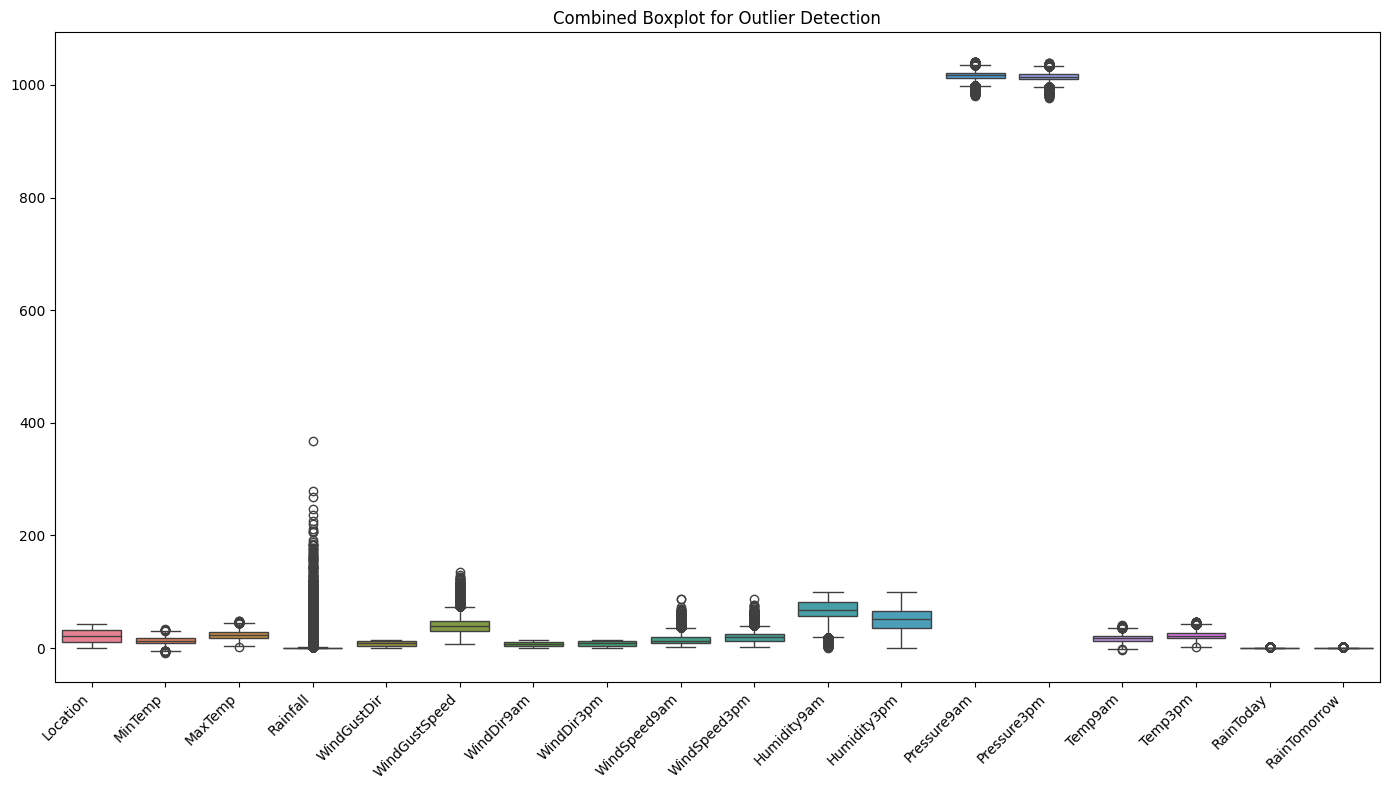

In [13]:
showOutliers()

In [14]:
# Write the pre-processed DataFrame to a CSV file
df.to_csv('modified_dataset.csv', index=False)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [16]:
# Load the pre-processed dataset
df = pd.read_csv('modified_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000, solver='liblinear')
logistic_model.fit(X_train, y_train)

# Initialize and fit the Naïve Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predictions
logistic_predictions = logistic_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test)

# Calculate accuracy
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)

# Print accuracies
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Naïve Bayes Classifier Accuracy:", naive_bayes_accuracy)

Logistic Regression Accuracy: 0.8486606154527341
Naïve Bayes Classifier Accuracy: 0.8093867611246403


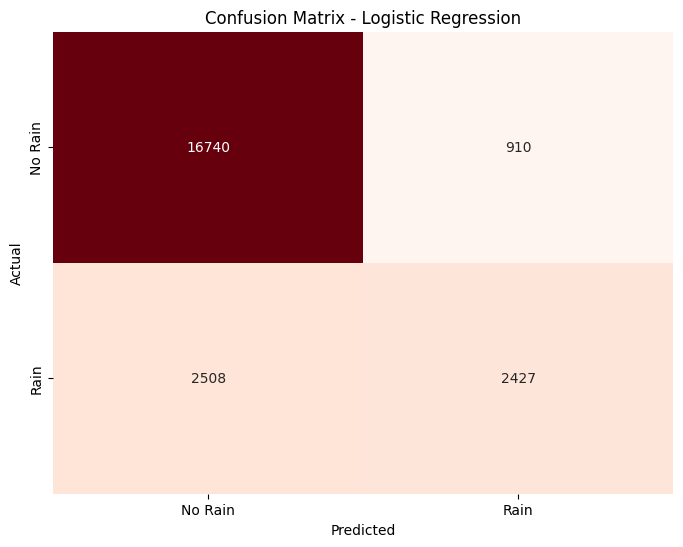

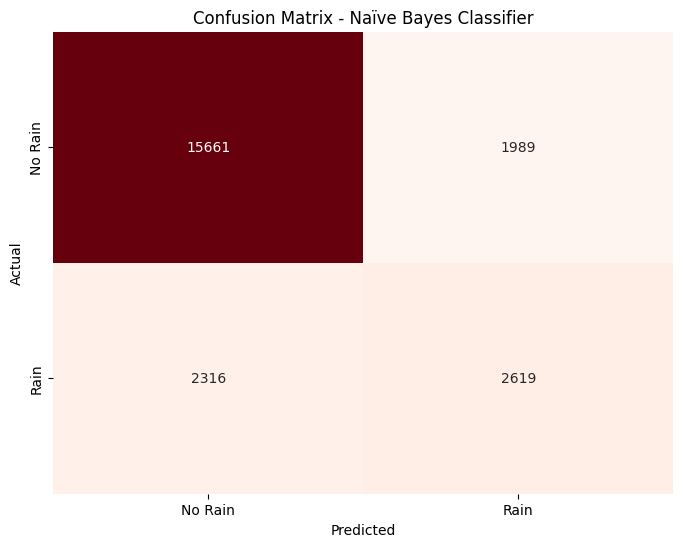

In [17]:
# Calculate confusion matrix for Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)

# Calculate confusion matrix for Naïve Bayes Classifier
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)

# Visualize confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize confusion matrix for Naïve Bayes Classifier
plt.figure(figsize=(8, 6))
sns.heatmap(naive_bayes_conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix - Naïve Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
from sklearn.metrics import classification_report

In [19]:
# Classification report for Logistic Regression
logistic_report = classification_report(y_test, logistic_predictions, target_names=['No Rain', 'Rain'])
print("Classification Report - Logistic Regression:")
print(logistic_report)

# Classification report for Naïve Bayes Classifier
naive_bayes_report = classification_report(y_test, naive_bayes_predictions, target_names=['No Rain', 'Rain'])
print("\nClassification Report - Naïve Bayes Classifier:")
print(naive_bayes_report)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

     No Rain       0.87      0.95      0.91     17650
        Rain       0.73      0.49      0.59      4935

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585


Classification Report - Naïve Bayes Classifier:
              precision    recall  f1-score   support

     No Rain       0.87      0.89      0.88     17650
        Rain       0.57      0.53      0.55      4935

    accuracy                           0.81     22585
   macro avg       0.72      0.71      0.71     22585
weighted avg       0.81      0.81      0.81     22585



In [20]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np

ROC-AUC Score - Logistic Regression: 0.8606420807609403


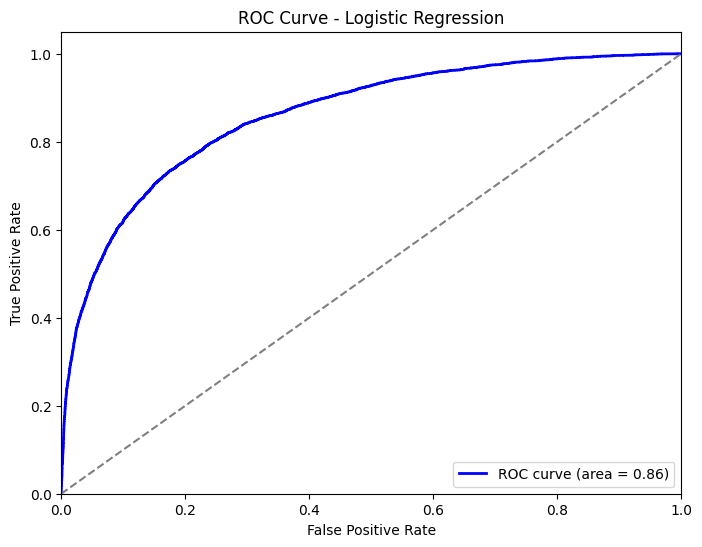

Optimal Threshold - Logistic Regression: 0.2474579520487184

Adjusted Logistic Regression Metrics:
Accuracy: 0.8048262120876688
Precision: 0.539182156133829
Recall: 0.7347517730496453
F1 Score: 0.6219554030874785


In [21]:
# Calculate the predicted probabilities for Logistic Regression
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Logistic Regression
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_probabilities)

# Calculate ROC-AUC score for Logistic Regression
roc_auc_logistic = roc_auc_score(y_test, logistic_probabilities)
print("ROC-AUC Score - Logistic Regression:", roc_auc_logistic)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold for Logistic Regression
optimal_idx = np.argmax(tpr_logistic - fpr_logistic)
optimal_threshold_logistic = thresholds_logistic[optimal_idx]
print("Optimal Threshold - Logistic Regression:", optimal_threshold_logistic)

# Adjust predictions based on the optimal threshold for Logistic Regression
adjusted_logistic_predictions = (logistic_probabilities >= optimal_threshold_logistic).astype(int)

# Re-calculate metrics for adjusted Logistic Regression predictions
adjusted_logistic_accuracy = accuracy_score(y_test, adjusted_logistic_predictions)
adjusted_logistic_precision = precision_score(y_test, adjusted_logistic_predictions)
adjusted_logistic_recall = recall_score(y_test, adjusted_logistic_predictions)
adjusted_logistic_f1 = f1_score(y_test, adjusted_logistic_predictions)

# Print adjusted metrics for Logistic Regression
print("\nAdjusted Logistic Regression Metrics:")
print("Accuracy:", adjusted_logistic_accuracy)
print("Precision:", adjusted_logistic_precision)
print("Recall:", adjusted_logistic_recall)
print("F1 Score:", adjusted_logistic_f1)

ROC-AUC Score - Naïve Bayes Classifier: 0.8187031752728818


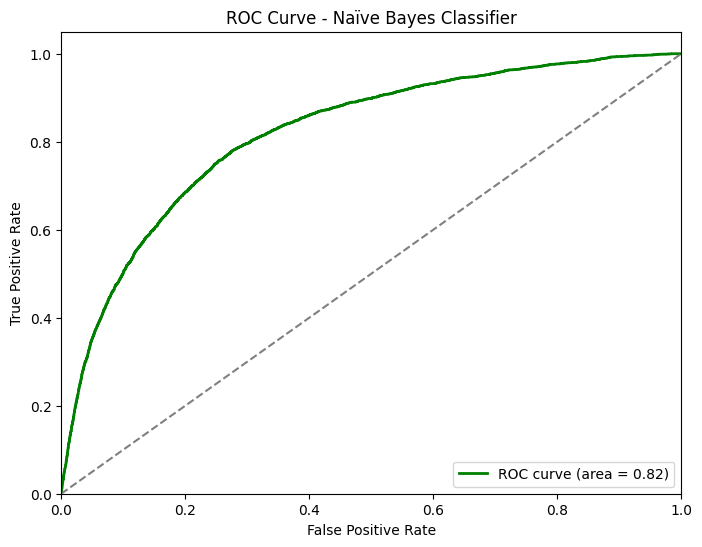

Optimal Threshold - Naïve Bayes Classifier: 0.056500208787053655

Adjusted Naïve Bayes Classifier Metrics:
Accuracy: 0.7355324330307726
Precision: 0.44065858678252917
Recall: 0.780952380952381
F1 Score: 0.5634091075213801


In [22]:
# Calculate the predicted probabilities for Naïve Bayes Classifier
naive_bayes_probabilities = naive_bayes_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for Naïve Bayes Classifier
fpr_naive_bayes, tpr_naive_bayes, thresholds_naive_bayes = roc_curve(y_test, naive_bayes_probabilities)

# Calculate ROC-AUC score for Naïve Bayes Classifier
roc_auc_naive_bayes = roc_auc_score(y_test, naive_bayes_probabilities)
print("ROC-AUC Score - Naïve Bayes Classifier:", roc_auc_naive_bayes)

# Plot ROC curve for Naïve Bayes Classifier
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive_bayes, tpr_naive_bayes, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_naive_bayes)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes Classifier')
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold for Naïve Bayes Classifier
optimal_idx_nb = np.argmax(tpr_naive_bayes - fpr_naive_bayes)
optimal_threshold_nb = thresholds_naive_bayes[optimal_idx_nb]
print("Optimal Threshold - Naïve Bayes Classifier:", optimal_threshold_nb)

# Adjust predictions based on the optimal threshold for Naïve Bayes Classifier
adjusted_naive_bayes_predictions = (naive_bayes_probabilities >= optimal_threshold_nb).astype(int)

# Re-calculate metrics for adjusted Naïve Bayes Classifier predictions
adjusted_naive_bayes_accuracy = accuracy_score(y_test, adjusted_naive_bayes_predictions)
adjusted_naive_bayes_precision = precision_score(y_test, adjusted_naive_bayes_predictions)
adjusted_naive_bayes_recall = recall_score(y_test, adjusted_naive_bayes_predictions)
adjusted_naive_bayes_f1 = f1_score(y_test, adjusted_naive_bayes_predictions)

# Print adjusted metrics for Naïve Bayes Classifier
print("\nAdjusted Naïve Bayes Classifier Metrics:")
print("Accuracy:", adjusted_naive_bayes_accuracy)
print("Precision:", adjusted_naive_bayes_precision)
print("Recall:", adjusted_naive_bayes_recall)
print("F1 Score:", adjusted_naive_bayes_f1)

In [23]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [24]:
# Define the number of folds for cross-validation
num_folds = 5

# Initialize StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

# Perform cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("Cross-Validation Scores - Logistic Regression:", logistic_cv_scores)
print("Mean CV Accuracy - Logistic Regression:", np.mean(logistic_cv_scores))

# Perform cross-validation for Naïve Bayes Classifier
naive_bayes_cv_scores = cross_val_score(naive_bayes_model, X, y, cv=stratified_kfold, scoring='accuracy')
print("\nCross-Validation Scores - Naïve Bayes Classifier:", naive_bayes_cv_scores)
print("Mean CV Accuracy - Naïve Bayes Classifier:", np.mean(naive_bayes_cv_scores))

Cross-Validation Scores - Logistic Regression: [0.84781935 0.85003321 0.84684525 0.84693381 0.84870489]
Mean CV Accuracy - Logistic Regression: 0.8480673013061766

Cross-Validation Scores - Naïve Bayes Classifier: [0.80974098 0.81031658 0.81182201 0.81186628 0.8127961 ]
Mean CV Accuracy - Naïve Bayes Classifier: 0.8113083905246846


In [25]:
# Calculate training accuracy for Logistic Regression
logistic_train_accuracy = logistic_model.score(X_train, y_train)

# Calculate testing accuracy for Logistic Regression
logistic_test_accuracy = logistic_model.score(X_test, y_test)

print("Training Accuracy - Logistic Regression:", logistic_train_accuracy)
print("Testing Accuracy - Logistic Regression:", logistic_test_accuracy)

# Calculate training accuracy for Naïve Bayes Classifier
naive_bayes_train_accuracy = naive_bayes_model.score(X_train, y_train)

# Calculate testing accuracy for Naïve Bayes Classifier
naive_bayes_test_accuracy = naive_bayes_model.score(X_test, y_test)

print("\nTraining Accuracy - Naïve Bayes Classifier:", naive_bayes_train_accuracy)
print("Testing Accuracy - Naïve Bayes Classifier:", naive_bayes_test_accuracy)

Training Accuracy - Logistic Regression: 0.8481182200575603
Testing Accuracy - Logistic Regression: 0.8486606154527341

Training Accuracy - Naïve Bayes Classifier: 0.8119216294000443
Testing Accuracy - Naïve Bayes Classifier: 0.8093867611246403


In [26]:
from sklearn.model_selection import GridSearchCV

# Define a range of values for the regularization hyperparameter C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Update the logistic model with the best hyperparameters
best_logistic_model = grid_search.best_estimator_

# Evaluate the best logistic model on the testing set
best_logistic_test_accuracy = best_logistic_model.score(X_test_scaled, y_test)
print("Testing Accuracy with Best Logistic Regression Model:", best_logistic_test_accuracy)

Best Hyperparameters: {'C': 0.1}
Best Cross-Validation Accuracy: 0.8495129510737216
Testing Accuracy with Best Logistic Regression Model: 0.8475094088997122


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define a range of values for the hyperparameters (No hyperparameters to tune for Naïve Bayes)
param_grid = {} 

# Initialize Naïve Bayes Classifier
naive_bayes_classifier = GaussianNB()

# Perform Grid Search Cross-Validation
grid_search_nb = GridSearchCV(estimator=naive_bayes_classifier, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search_nb.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_
best_score_nb = grid_search_nb.best_score_

print("Best Hyperparameters - Naïve Bayes Classifier:", best_params_nb)
print("Best Cross-Validation Accuracy - Naïve Bayes Classifier:", best_score_nb)

# Update the Naïve Bayes model with the best hyperparameters (No hyperparameters to update)
best_naive_bayes_model = grid_search_nb.best_estimator_

# Evaluate the best Naïve Bayes model on the testing set
best_naive_bayes_test_accuracy = best_naive_bayes_model.score(X_test_scaled, y_test)
print("Testing Accuracy with Best Naïve Bayes Classifier Model:", best_naive_bayes_test_accuracy)

Best Hyperparameters - Naïve Bayes Classifier: {}
Best Cross-Validation Accuracy - Naïve Bayes Classifier: 0.811711312818242
Testing Accuracy with Best Naïve Bayes Classifier Model: 0.8093867611246403
